In [2]:
import pandas as pd
import numpy as np
import scipy

In [5]:
#tumor stage and treatment_type
tcga_clinical=pd.read_csv('tcga-skcm/clinical.csv')
tcga_clinical_sub=tcga_clinical[['case_submitter_id','ajcc_pathologic_m','ajcc_pathologic_t']]
tcga_clinical_sub=tcga_clinical_sub.rename(columns = {"case_submitter_id":"Patients"})

In [6]:
tcga_clinical_sub['ajcc_pathologic_m'].value_counts()

M0     836
'--     56
M1c     20
M1b     10
M1      10
M1a      8
Name: ajcc_pathologic_m, dtype: int64

In [7]:
tcga_clinical_sub[tcga_clinical_sub['ajcc_pathologic_m'].isin(['M1c','M1','M1b','M1a'])]

,Patients,ajcc_pathologic_m,ajcc_pathologic_t
30,TCGA-GN-A263,M1c,T4b
31,TCGA-GN-A263,M1c,T4b
52,TCGA-WE-A8K5,M1c,T2a
53,TCGA-WE-A8K5,M1c,T2a
136,TCGA-FS-A1Z3,M1,TX
137,TCGA-FS-A1Z3,M1,TX
152,TCGA-EB-A5FP,M1b,T4b
153,TCGA-EB-A5FP,M1b,T4b
188,TCGA-RP-A695,M1c,TX
189,TCGA-RP-A695,M1c,TX


In [8]:
tcga_clinical_sub=tcga_clinical_sub.drop_duplicates(subset=['Patients'], keep='first')

In [9]:
#ssGSEA of MHC-I and MHC-II
mhc=pd.read_csv('tcga-skcm/TCGA-SKCM-ssGSEA.csv')
for i in range(len(mhc)):
    patient_id=mhc.iloc[i,0]
    patient_id_l=patient_id.split('-')
    patient_id_new=patient_id_l[0]+'-'+patient_id_l[1]+'-'+patient_id_l[2]
    mhc.iloc[i,0]=patient_id_new

In [10]:
mhc.head(3)

,Patients,MHC-II HLA Geneset,MHC-I HLA and APM Geneset
0,TCGA-3N-A9WB,-10662.623480,-1602.267569
1,TCGA-3N-A9WC,10449.358510,10360.316490
2,TCGA-3N-A9WD,5523.701612,2741.637894


In [11]:
#abstract the pd-1 expression 
#tcga_genes=pd.read_csv('tcga-skcm/RNA_TCGA_SKCM.csv')
#tcga_pd=tcga_genes[tcga_genes['GeneSymbol']=='PDCD1'].T
#tcga_pd.to_csv('tcga-skcm/PDCD1.csv')
tcga_pd=pd.read_csv('tcga-skcm/PDCD1.csv')

In [12]:
#from the cibersort analysis import the information of treg
tcga_treg=pd.read_csv('tcga-skcm/TCGA_SKCM_CIBERSORT.csv')
tcga_treg_sub=tcga_treg[['sample_name','T cells CD8','T cells regulatory (Tregs)']]
tcga_treg_sub=tcga_treg_sub.rename(columns = {"sample_name":"Patients"})
tcga_treg_sub.head(3)

,Patients,T cells CD8,T cells regulatory (Tregs)
0,TCGA-3N-A9WB,0.026118,0.006082
1,TCGA-3N-A9WC,0.398264,0.054761
2,TCGA-3N-A9WD,0.252902,0.074125


In [13]:
#from the time signature import the informaiton of cd8+T 
tcga_time=pd.read_csv('tcga-skcm/tcga_time.csv')
tcga_time_sub=tcga_time[['x','T.CD8']]
tcga_time_sub=tcga_time_sub.rename(columns = {"x":"Patients"})
tcga_time_sub.head(3)

,Patients,T.CD8
0,TCGA-EE-A2GE,1.509375
1,TCGA-ER-A193,1.019785
2,TCGA-EB-A3Y6,-0.263430


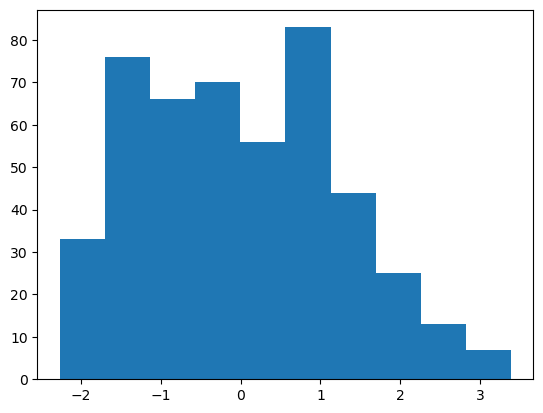

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(tcga_time_sub['T.CD8'])
plt.show()

In [15]:
#merge all the table above
tcga_all=pd.merge(tcga_clinical_sub,mhc,on='Patients',how='inner')

In [16]:
tcga_all=pd.merge(tcga_all,tcga_pd,on='Patients',how='inner')

In [17]:
tcga_all=pd.merge(tcga_all,tcga_treg_sub,on='Patients',how='inner')

In [18]:
tcga_all=pd.merge(tcga_all,tcga_time_sub,on='Patients',how='inner')

In [19]:
#mapping tumor stage to tumor population
tcga_all['ajcc_pathologic_t'].value_counts()

T4b    111
TX      47
T3b     40
T3a     39
T2a     34
T2      32
'--     30
T4a     28
T0      23
T1a     21
T2b     15
T4      15
T3      14
T1      10
T1b     10
Tis      8
Name: ajcc_pathologic_t, dtype: int64

In [20]:
# TX: Primary tumour cannot be assessed.
# T0: No evidence of primary tumour.
# Tis: Melanoma in situ (Clark level I – it remains in the epidermis).
# T1a: The melanoma is less than or equal to 1.0 mm thick (1.0 mm = 1/25 or .04 inches), without ulceration and < 1 mitioses / mm2.
# T1b: The melanoma is less than or equal to 1.0 mm thick, > 1 mitoses/mm2, and/or with ulceration.
# T2a: The melanoma is between 1.01 and 2.0 mm thick without ulceration.
# T2b: The melanoma is between 1.01 and 2.0 mm thick with ulceration.

# T3a: The melanoma is between 2.01 and 4.0 mm thick without ulceration.
# T3b: The melanoma is between 2.01 and 4.0 mm thick with ulceration.
# T4a: The melanoma is thicker than 4.0 mm without ulceration.
# T4b: The melanoma is thicker than 4.0 mm with ulceration

#3.3e7(4mm),5e5(1mm),1.7e6(1.5mm),4e6(2mm),1.4e7(3mm),2.6e8(4mm)
tumor_size={'T4b':3.3e7,'T3b':1.4e7,'T3a':1.4e7,'T2a':1.7e6,'T2':1.7e6,
            'T4a':3.3e7,'T1a':5e5,'T4':3.3e7,'T2b':1.7e6,'T3':1.4e7,'T1':5e5,'T1b':5e5,
           'TX':1e5,'T0':1e5,'Tis':1e5}

tumor_size_l=[]
for i in range(len(tcga_all)):
    t_stage=tcga_all.iloc[i,2]
    try:
        tumor_s=tumor_size[t_stage]
    except:
        tumor_s=0
    tumor_size_l.append(tumor_s)
tcga_all['tumor_size']=tumor_size_l

In [21]:
#calculate the ratio of Treg to CD8+T in cibersort result
tcga_all['Treg_pro']=tcga_all['T cells regulatory (Tregs)']/tcga_all['T cells CD8']

#deal with abnormal value of Treg_pro
for i in range(len(tcga_all)):
    Treg_pro=tcga_all.loc[i,'Treg_pro']
    if Treg_pro>=0 and Treg_pro<100:
        pass
    else:
        tcga_all.loc[i,'Treg_pro']=0

In [22]:
#calculate total MHC expression in ssGSEA result
x=tcga_all['MHC-II HLA Geneset']+tcga_all['MHC-I HLA and APM Geneset']
tcga_all['mhc']=tcga_all['MHC-II HLA Geneset']+tcga_all['MHC-I HLA and APM Geneset']

In [23]:
x=x.tolist()
y=tcga_all['T.CD8']
#correlation of MHC expression and CD8+T cells' scores
r = np.corrcoef(x, y)
scipy.stats.pearsonr(x, y) 

PearsonRResult(statistic=0.8088017367892889, pvalue=1.3735154151201202e-111)

In [24]:
#delete the samples without tumor stage record
tcga_all=tcga_all[tcga_all['tumor_size']>0]

In [25]:
#Because the expression of PDCD1 is long tail,normalize it by np.log(x+1)/np.log(max(x)+1)
tcga_all['PDCD1'].describe()
tcga_all['mu']=np.log(tcga_all['PDCD1']+1)/8.83

In [26]:
#normalize the MHC expression
tcga_all['mhc_norm']=(tcga_all['mhc']+22245)/(22210+22245)

In [27]:
#because the ratio of CD8+T cells to tumor cells is about 0-0.03, map the CD8+T score to CD8+T/tumor ratio
tcga_all['T.CD8'].describe()

count    447.000000
mean      -0.023598
std        1.222055
min       -2.231578
25%       -1.054362
50%       -0.099072
75%        0.900045
max        3.384689
Name: T.CD8, dtype: float64

In [3]:
cd8t_std=0.0053
-1.054362*cd8t_std+cd8t_std*2.231578

0.006239244799999999

In [28]:
cd8t_std=0.03/(2.231578+3.384689)
print(cd8t_std)
cd8t_mean=cd8t_std*2.231578
tcga_all['tcd8_pop']=(tcga_all['T.CD8']*cd8t_std+cd8t_mean)

0.0053416263863523585


In [206]:
tcga_all['a']=np.random.uniform(1.45e-2,2.23e-2,len(tcga_all))

In [198]:
tcga_all=tcga_all[tcga_all['ajcc_pathologic_m']=='M0']

In [207]:
tcga_all.to_csv('Preprocessed_data/tcga_all.csv')